# 5. Convolutional Neural Networks (CNN)

1. Experimento 1

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

from minisom import MiniSom
import copy

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
# Cargar el dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificar las etiquetas en formato one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
# Just to have short codes
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Building and training a model
# Implementación de la arquitectura del modelo
model = tf.keras.Sequential()

# Capa convolucional con 32 filtros, tamaño de kernel 3x3 y función de activación ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Capa de MaxPooling con tamaño de ventana 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de Flatten para convertir las características convolucionales en un vector unidimensional
model.add(Flatten())

# Capa densa con 128 unidades y función de activación ReLU
model.add(Dense(128, activation='relu'))

# Capa densa de salida con 10 unidades y función de activación Softmax para la clasificación multiclase
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

/Users/danny/Documents/ITESM/8vo Semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Inteligencia Artificial/Actividad M2.5/M2.5env3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Entrenamiento del modelo
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3983 - loss: 1.6954 - val_accuracy: 0.5578 - val_loss: 1.2604
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5824 - loss: 1.1938 - val_accuracy: 0.6051 - val_loss: 1.1245
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6329 - loss: 1.0554 - val_accuracy: 0.6000 - val_loss: 1.1536
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6621 - loss: 0.9673 - val_accuracy: 0.6349 - val_loss: 1.0557
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6935 - loss: 0.8843 - val_accuracy: 0.6303 - val_loss: 1.0746
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7135 - loss: 0.8192 - val_accuracy: 0.6505 - val_loss: 1.0176
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7378 - loss: 0.7542 - val_accuracy: 0.6391 - val_loss: 1.0494
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7582 - loss: 0.6977 - val_ac

{'verbose': 1, 'epochs': 20, 'steps': 782}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


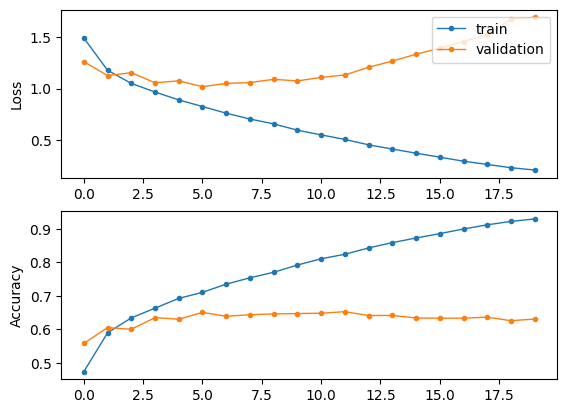

In [7]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [8]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6886767148971558
Test accuracy: 0.6306999921798706


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[3 0 0 0 3 6 1 2 3 1]


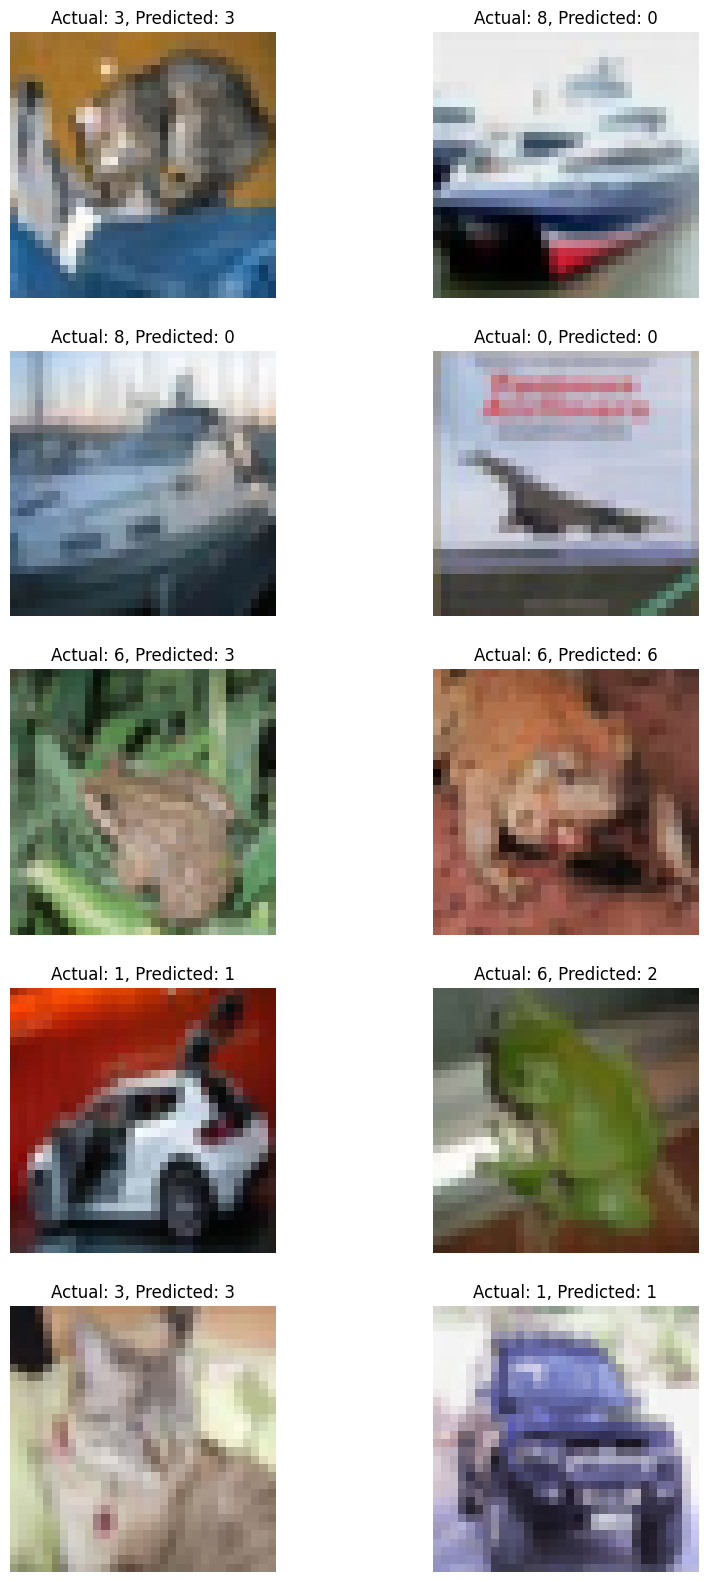

In [9]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()

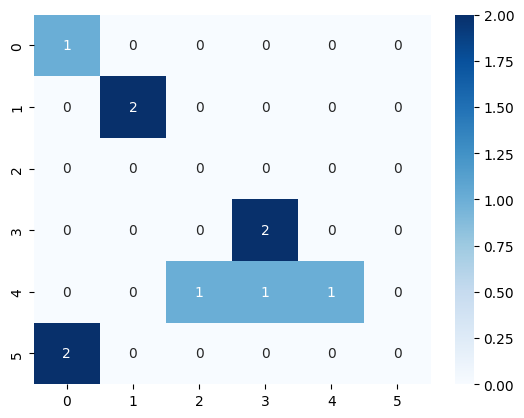

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual, predicted)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

2. Experimento 2

In [11]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificar las etiquetas en formato one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [12]:
# Implementación de la arquitectura del modelo modificado
model = Sequential()

# Capa convolucional con 32 filtros, tamaño de kernel 3x3 y función de activación ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Capa convolucional adicional con 64 filtros, tamaño de kernel 3x3 y función de activación ReLU
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Capa de MaxPooling con tamaño de ventana 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de Dropout con una tasa de 0.25 para reducir el sobreajuste
model.add(Dropout(0.25))

# Capa de Flatten para convertir las características convolucionales en un vector unidimensional
model.add(Flatten())

# Capa densa con 128 unidades y función de activación ReLU
model.add(Dense(128, activation='relu'))

# Capa de Dropout con una tasa de 0.5 para reducir el sobreajuste
model.add(Dropout(0.5))

# Capa densa de salida con 10 unidades y función de activación Softmax para la clasificación multiclase
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

/Users/danny/Documents/ITESM/8vo Semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Inteligencia Artificial/Actividad M2.5/M2.5env3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Entrenamiento del modelo
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.3223 - loss: 1.8433 - val_accuracy: 0.5492 - val_loss: 1.2958
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5078 - loss: 1.3665 - val_accuracy: 0.6135 - val_loss: 1.0922
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.5762 - loss: 1.1978 - val_accuracy: 0.6448 - val_loss: 1.0069
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.6080 - loss: 1.1102 - val_accuracy: 0.6307 - val_loss: 1.0571
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6236 - loss: 1.0603 - val_accuracy: 0.6677 - val_loss: 0.9726
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6405 - loss: 1.0081 - val_accuracy: 0.6764 - val_loss: 0.9325
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.6553 - loss: 0.9711 - val_accuracy: 0.6714 - val_loss: 0.9432
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6667 - loss: 0.9396 - 

{'verbose': 1, 'epochs': 20, 'steps': 782}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


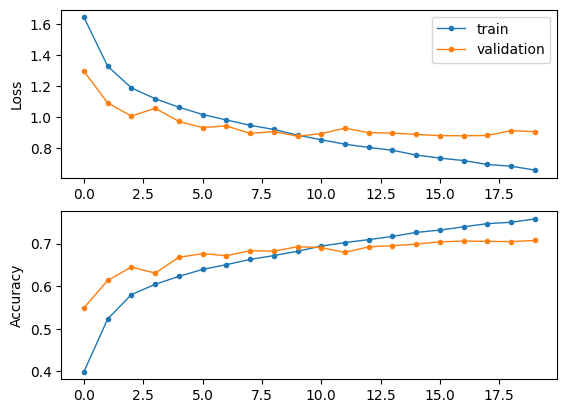

In [14]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [15]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9054219722747803
Test accuracy: 0.7071999907493591


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[3 8 8 0 6 6 1 6 3 1]


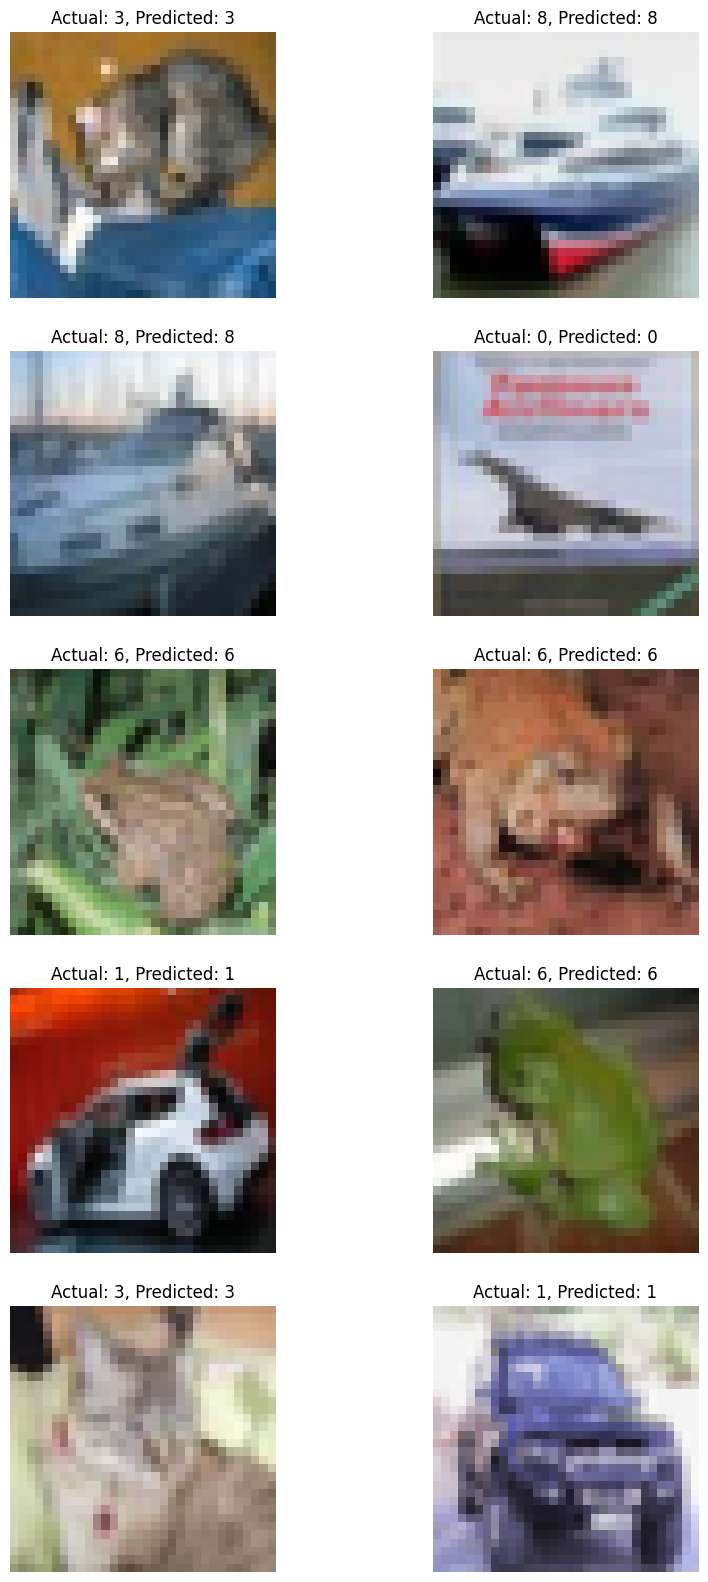

In [16]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()

3. Experimento 3

In [39]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Cargar datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

In [42]:
# Función para crear el modelo Keras
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Crear el modelo KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'model__learning_rate': [0.001, 0.01, 0.1]
}

# Crear GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Ajustar el modelo
grid_result = grid.fit(x_train, y_train)

# Imprimir los mejores hiperparámetros
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/danny/Documents/ITESM/8vo Semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Inteligencia Artificial/Actividad M2.5/M2.5env3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/danny/Documents/ITESM/8vo Semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Inteligencia Artificial/Actividad M2.5/M2.5env3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/danny

KeyboardInterrupt: 

In [ ]:
# Evaluar en el conjunto de prueba
best_model = grid_result.best_estimator_.model

TypeError: create_model() got an unexpected keyword argument 'batch_size'

In [ ]:
history= model.fit(x_train, y_train,
          batch_size=best_params['batch_size'],
          epochs=best_params['epochs'],
          validation_data=(x_val, y_val),
          verbose=1)

In [ ]:
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = best_model.evaluate(x_val, y_val, verbose=0)
print("Precisión en el conjunto de validación:", val_accuracy)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
print("Precisión en el conjunto de prueba:", test_accuracy)

In [ ]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [ ]:
# Evaluación del modelo final en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()

4. Experimento 4

In [ ]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificar las etiquetas en formato one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Aplicar aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Cargar el modelo pre-entrenado VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo pre-entrenado
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Añadir capas adicionales encima del modelo pre-entrenado
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo con aumento de datos
batch_size = 64
epochs = 20
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=len(x_train) // batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          verbose=1)

In [ ]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [ ]:
# Evaluación del modelo en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()